<div class="alert alert-success h1" role="alert">
    <b> Introduction
</b>
<a class="anchor" id="intro"></a> </div>

We will study a housing dataset of Boston. The objective is to apply different regression models in order to predict the housing price. The Boston Housing Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000usd
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

<div class="alert alert-success h1" role="alert">
    <b>Data</b>
<a class="anchor" id="intro"></a> </div>

In [1]:
#Data treatment
# ==============================================================================
import pandas as pd
import numpy as np

#Data visualization
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprocess and analysis
# ==============================================================================
import pingouin as pg
import statsmodels.api as sm
from scipy import stats

#Machine learning
# ==============================================================================
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score,train_test_split, RepeatedKFold, GridSearchCV, ParameterGrid
from sklearn.neighbors import NearestNeighbors
import multiprocessing
#Warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data=pd.read_csv('housing data.csv', header=None, delimiter=",", names=column_names)
df=data.copy()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.select_dtypes(include=['float64', 'int']).describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [6]:
# Defining dependent and independent variables
X = df.drop(columns=['MEDV'], axis=1)
y=df['MEDV']
print(X.shape,y.shape)

(506, 13) (506,)


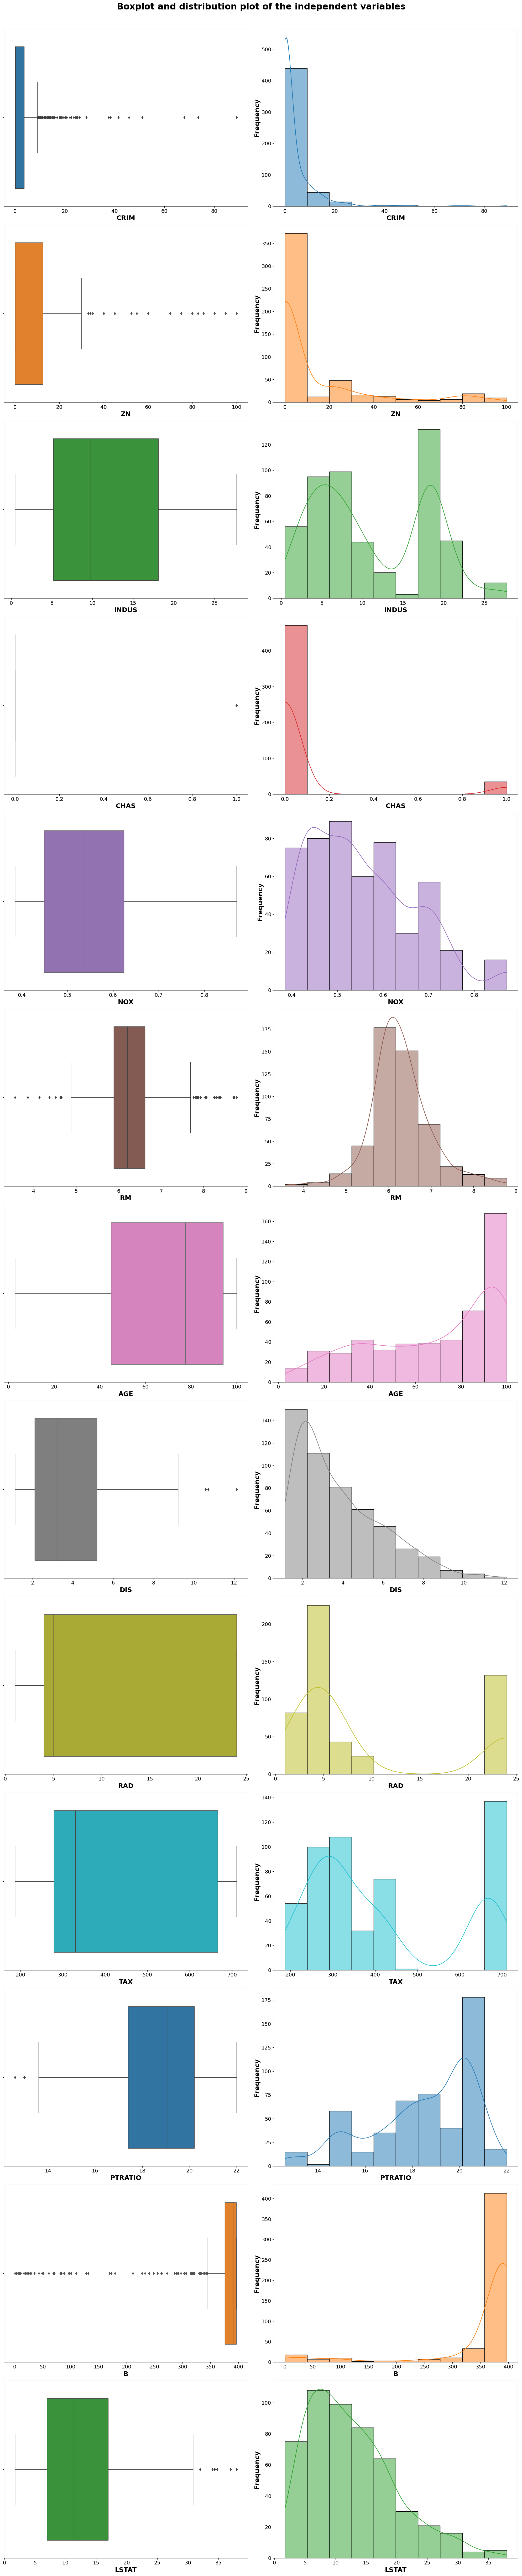

In [7]:
# Distribution dependent-variable
# ==============================================================================
def plot_independent_variables(dataset):
    fig, axs = plt.subplots(ncols=2, nrows=len(dataset.columns), figsize=(20, 100))
    row=0
    for i in dataset.columns:
        plt.gca().set(xlabel= i,ylabel='Frequency')
        sns.boxplot(x=dataset[i],  ax=axs[row][0] , linewidth= 1.0, color   = (list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
        axs[row][0].set_xlabel(str(i), fontsize = 18, fontweight = "bold")
        axs[row][0].tick_params(labelsize = 14)
        sns.histplot(dataset[i], ax=axs[row][1], bins = 10,kde=True,  color   = (list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
        axs[row][1].set_xlabel(str(i),fontsize = 18, fontweight = "bold")
        axs[row][1].set_ylabel('Frequency', fontsize = 18, fontweight = "bold")
        axs[row][1].tick_params(labelsize = 14)
        row+=1
    fig.tight_layout()
    plt.subplots_adjust(top=0.97)
    fig.suptitle('Boxplot and distribution plot of the independent variables', fontsize = 24, fontweight = "bold");
plot_independent_variables(X)

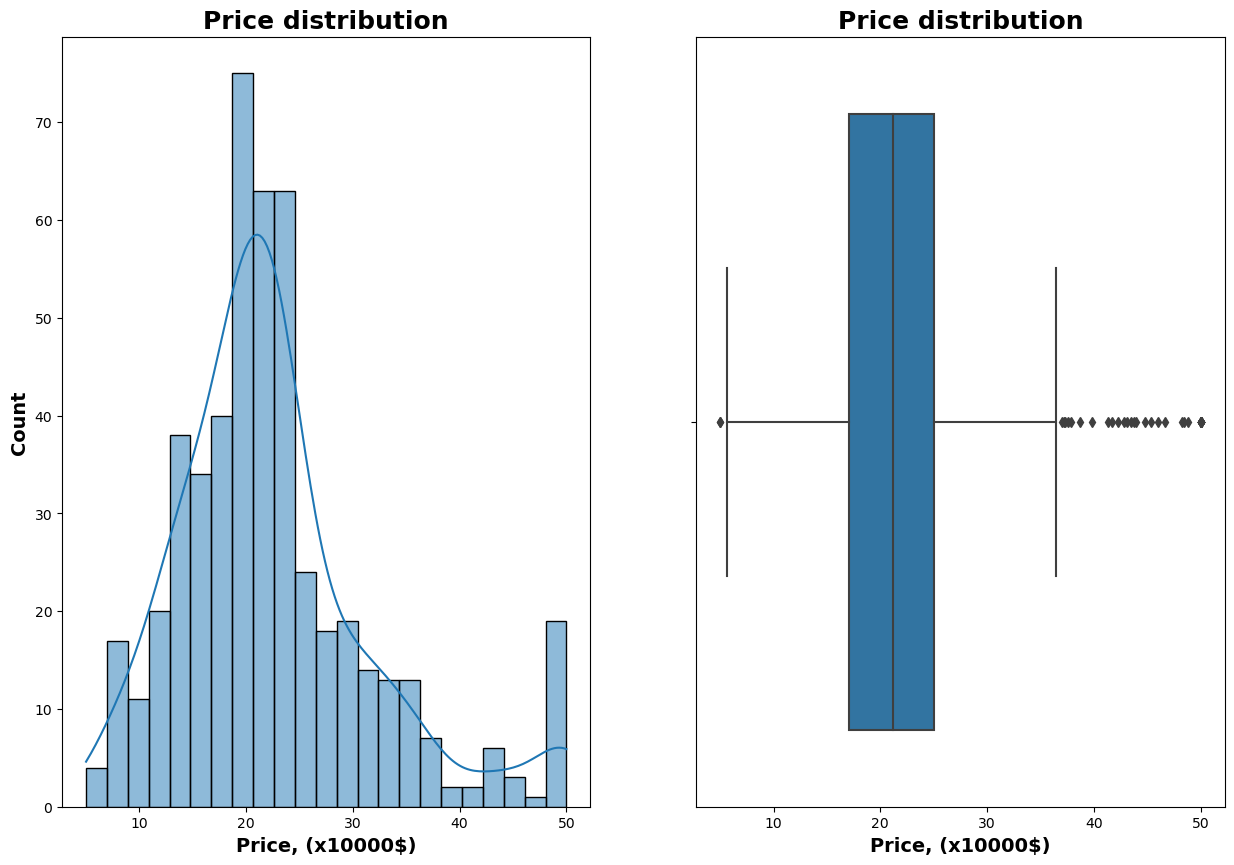

In [8]:
# Distribution independent-variable
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.histplot(data=df, x='MEDV', kde=True,ax=ax[0])
ax[0].set_title("Price distribution", fontsize = 18, fontweight = "bold")
ax[0].set_xlabel('Price, (x10000$)', fontsize = 14, fontweight = "bold");
ax[0].set_ylabel('Count',fontsize = 14, fontweight = "bold");
sns.boxplot(data=df, x='MEDV',ax=ax[1])
ax[1].set_title("Price distribution", fontsize = 18, fontweight = "bold")
ax[1].set_xlabel('Price, (x10000$)', fontsize = 14, fontweight = "bold");

In [9]:
#Calculate percentage of outliers
columns_outliers={}
print("-------------------------------------------")
print('Percentage of outliers')
print("-------------------------------------------")
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
        columns_outliers[k]=perc

-------------------------------------------
Percentage of outliers
-------------------------------------------
Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


<AxesSubplot: >

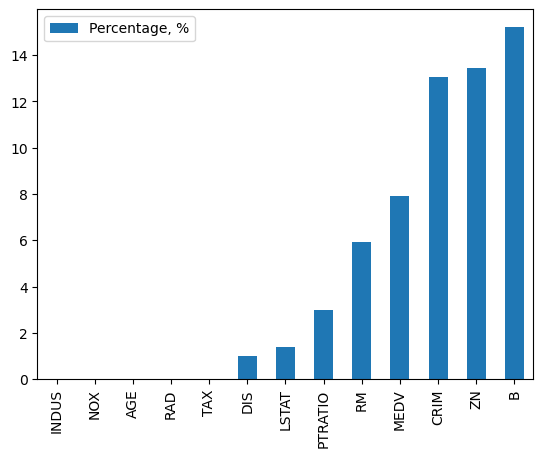

In [10]:
percentage_out=pd.DataFrame(columns_outliers.values(), index=columns_outliers.keys())
percentage_out.columns=['Percentage, %']
percentage_out=percentage_out.drop(index=['CHAS'], axis=1)
percentage_out=percentage_out.sort_values(by=['Percentage, %'])
percentage_out.plot(kind='bar')


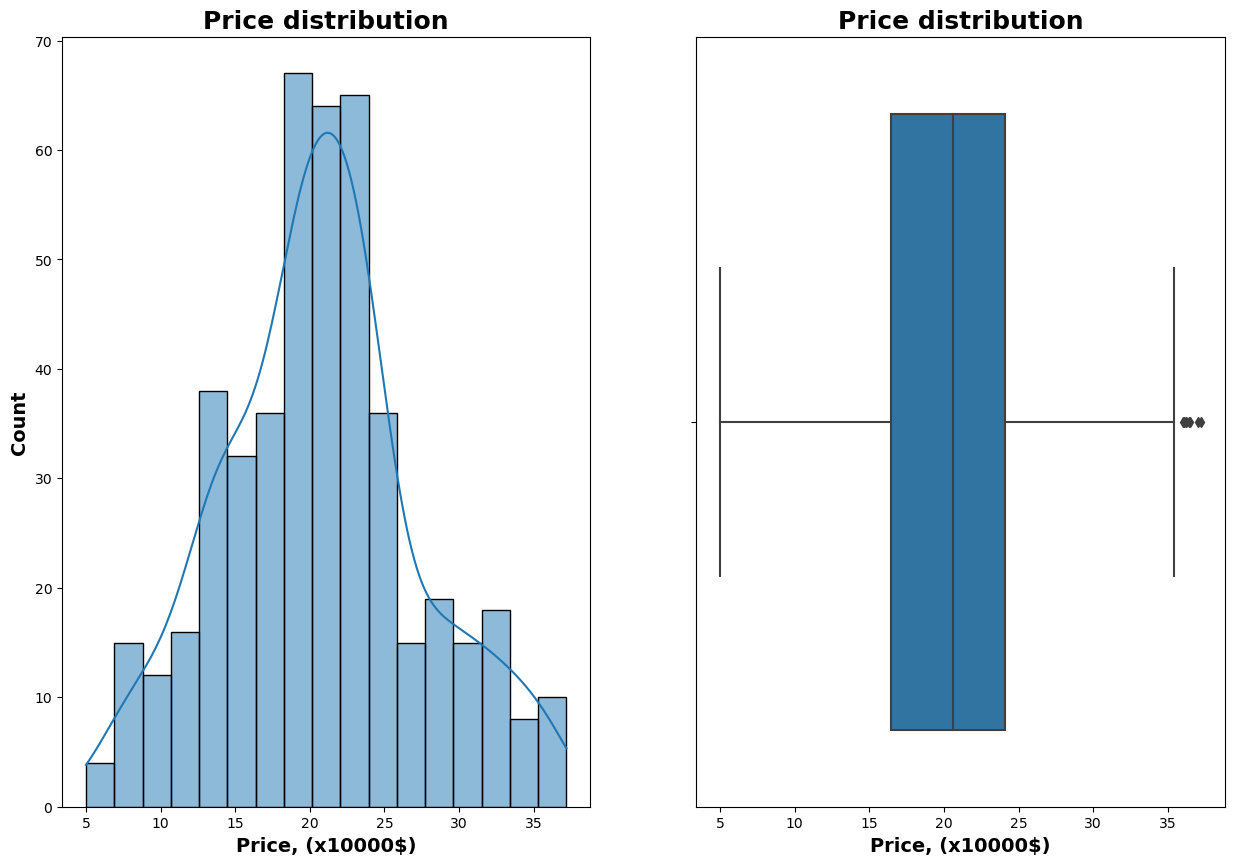

In [11]:
#Removing outliers of target variable: 
df=df[df['MEDV'].between(df['MEDV'].quantile(.0), df['MEDV'].quantile(.93))]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.histplot(data=df, x='MEDV', kde=True,ax=ax[0])
ax[0].set_title("Price distribution", fontsize = 18, fontweight = "bold")
ax[0].set_xlabel('Price, (x10000$)', fontsize = 14, fontweight = "bold");
ax[0].set_ylabel('Count',fontsize = 14, fontweight = "bold");
sns.boxplot(data=df, x='MEDV',ax=ax[1])
ax[1].set_title("Price distribution", fontsize = 18, fontweight = "bold")
ax[1].set_xlabel('Price, (x10000$)', fontsize = 14, fontweight = "bold");

In [12]:
# Defining dependent and independent variables
X = df.drop(columns=['MEDV'], axis=1)
y=df['MEDV']
print(X.shape,y.shape)

(470, 13) (470,)


In [13]:
# Transforming variables
# ==============================================================================

# Numerical transformations for variables with outliers
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', RobustScaler())
                        ]
                      )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, X.columns)
                    ],
                    remainder = 'drop'
                )
# Pipeline
# ==============================================================================

from sklearn import set_config
set_config(display='diagram')

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object'))])

In [14]:
# Train/test split
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        random_state = 123
                                    )
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(352, 13) (118, 13) (352,) (118,)


<div class="alert alert-success h1" role="alert">
    <b>Finding the best model</b>
<a class="anchor" id="intro"></a> </div>

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
## Loop to find best models
random_state_=42
rfc = RandomForestRegressor(random_state=random_state_)
gbr = GradientBoostingRegressor(random_state=random_state_)
knn = KNeighborsRegressor()
desc_tr = DecisionTreeRegressor(random_state=random_state_)
reg = XGBRegressor(random_state=random_state_)
lm = LinearRegression()
models = [rfc, gbr, knn,desc_tr,reg,lm]
metrics= pd.DataFrame(index=['rfc', 'gbr', 'knn','desc_tr','reg','lm'])

In [16]:
def Trainingandmetrics(xtrain,ytrain, xtest, ytest,xdataset,ydataset,model):
    pipe = Pipeline([('preprocessing', preprocessor),
                 ('model', model)])
    pipe.fit(X = xtrain, y = ytrain)
    y_predicted=pipe.predict(X = xtest)
    rmse = mean_squared_error(
        y_true  = ytest,
        y_pred  = y_predicted,
        squared = False
       )
    mse=rmse**2
    score = cross_val_score(model, xdataset, ydataset, cv=5)
    score_mean=score.mean()
    score_std=score.std()
    r2 = r2_score(ytest.values.ravel(), y_predicted)
    return rmse,mse,r2, score_mean, score_std, y_predicted

In [17]:
RMSE_=[]
MSE_=[]
R2_=[]
score_mean_=[]
score_std_=[]
for model in models:
    f=Trainingandmetrics(X_train,y_train, X_test, y_test,X,y,model)    
    RMSE_.append(f[0])
    MSE_.append(f[1])
    R2_.append(f[2])
    score_mean_.append(f[3])
    score_std_.append(f[4])

In [18]:
metrics['RMSE'] = RMSE_
metrics['MSE'] = MSE_
metrics['R2'] = R2_
metrics['f1'] = score_mean_
metrics['f1_std_cv'] = score_std_
metrics

,RMSE,MSE,R2,f1,f1_std_cv
rfc,2.355453,5.548157,0.868136,0.602414,0.105987
gbr,2.167775,4.699249,0.888312,0.599481,0.086766
knn,3.132186,9.810590,0.766829,-0.153041,0.366884
desc_tr,3.769840,14.211695,0.662227,0.368982,0.180285
reg,2.284783,5.220232,0.875929,0.556119,0.111226
lm,3.012636,9.075973,0.784289,0.498472,0.185516


According to the prior metrics, the best model is the gbr (GradientBoostingRegressor) as it shows a similar f1 value to rfc (RandomForestRegressor), but it has a lower RMSE. 

<div class="alert alert-success h1" role="alert">
    <b> Hiperparameters optimization: GradientBoostingRegressor
</b>
<a class="anchor" id="intro"></a> </div>

Let's optimize the model, finding the optimal hyperparameters using a cross-validation (CV) approach.  

In [19]:
from sklearn.model_selection import GridSearchCV

# Hiperparameters grid
# ==============================================================================
model = GradientBoostingRegressor(alpha=0.9, random_state=random_state_)
pipe = Pipeline([('preprocessing', preprocessor),
                 ('model', model)])

params_grid = {'model__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
               'model__subsample'    : [0.5, 0.7, 1.0],
               'model__n_estimators' : [10, 50, 100, 500,1000],
               'model__max_depth'    : [2,3,4,5,6,7,8,9], 
}


results = {'params': [], 'oob_r2': []}
# Grid search via Cross validation (CV)
# ==============================================================================
grid = GridSearchCV(estimator= pipe, param_grid = params_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True, 
        refit=True
       )

grid.fit(X = X_train, y = y_train)
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
297,0.01,5,1000,0.5,-2.724225,0.288547,-0.385654,0.018001
282,0.01,4,1000,0.5,-2.724583,0.282725,-0.660772,0.024970
312,0.01,6,1000,0.5,-2.732730,0.281933,-0.231376,0.013669
327,0.01,7,1000,0.5,-2.738126,0.273141,-0.151424,0.009954


In [20]:
# Best parameters via CV
# ==============================================================================
print("----------------------------------------")
print("Best parameters (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Best parameters (cv)
----------------------------------------
{'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 1000, 'model__subsample': 0.5} : -2.724225180991281 neg_root_mean_squared_error


In [21]:
# Final model error
# ==============================================================================
final_model= grid.best_estimator_
final_model.fit(X = X_train, y = y_train)
predictions=final_model.predict(X = X_test)

In [22]:
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  =predictions,
        squared = False
       )
print("-------------------------------------------")
print("Predictions metrics")
print("-------------------------------------------")
print(f"The RMSE of the test is: {rmse} $")
print(f"The R2 of the test is: {r2_score(y_test.values.ravel(), predictions)}")
results=pd.DataFrame()
results['Real_values']=y_test
results['Predicted_values']=predictions
results['Relative_error, %']=100*((y_test-predictions).abs())/(y_test)
print(f"The mean relative error is: {results['Relative_error, %'].mean()} %")

-------------------------------------------
Predictions metrics
-------------------------------------------
The RMSE of the test is: 2.033827271224844 $
The R2 of the test is: 0.9016878579480925
The mean relative error is: 9.14408253911075 %


In [23]:
# D'Agostino's K-squared test
# ==============================================================================
residuals=y_test - predictions
k2, p_value = stats.normaltest(residuals)
print("-------------------------------------------")
print("Residuals metrics")
print("-------------------------------------------")
print(f"Statistic for residuals = {k2}, p-value = {p_value}")
print('Kursotis for residuals:', stats.kurtosis(residuals))
print('Skewness for residuals:', stats.skew(residuals))

-------------------------------------------
Residuals metrics
-------------------------------------------
Statistic for residuals = 2.2085000579116425, p-value = 0.33145937398233727
Kursotis for residuals: 0.16043667026032615
Skewness for residuals: 0.2895463804286037


As the $p_{value}$ is higher than 0.05, we may not reject the hyphotesis that the residualas are normally distributed.

In [24]:
predictors_weight= pd.DataFrame(
                            {'predictor': X_train.columns,
                             'weight': final_model.named_steps["model"].feature_importances_}
                            )
print("-------------------------------------------")
print("Weight of the predictors in the model")
print("-------------------------------------------")
predictors_weight=predictors_weight.sort_values('weight', ascending=False)
predictors_weight

-------------------------------------------
Weight of the predictors in the model
-------------------------------------------


,predictor,weight
12,LSTAT,0.468986
5,RM,0.200588
0,CRIM,0.059879
7,DIS,0.052599
4,NOX,0.043820
9,TAX,0.041495
6,AGE,0.037948
11,B,0.031491
10,PTRATIO,0.026706
2,INDUS,0.022318


Text(0, 0.5, 'Weight')

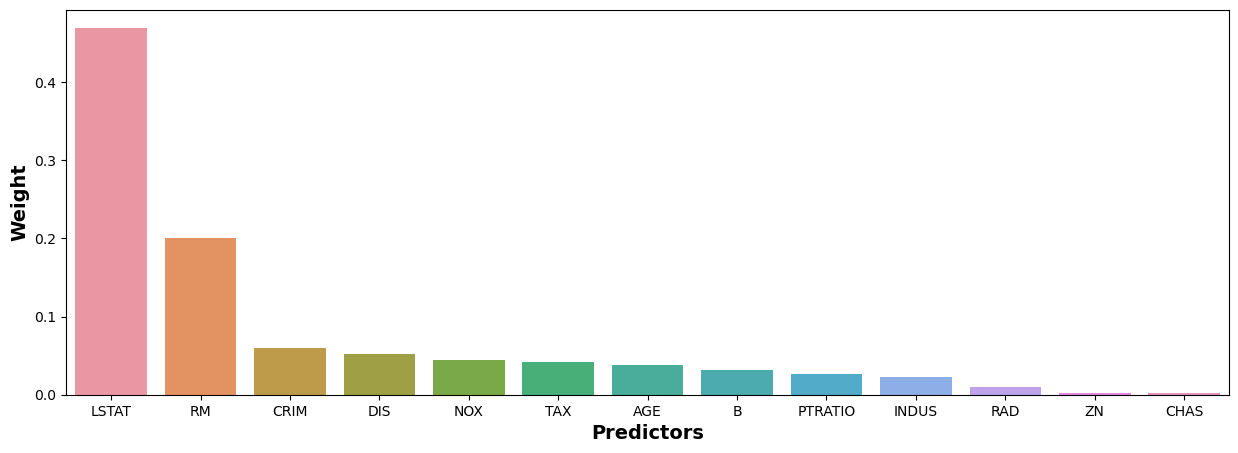

In [25]:
fig,ax= plt.subplots(figsize=(15, 5))
sns.barplot(data=predictors_weight, x='predictor', y='weight', ax=ax)
ax.set_xlabel('Predictors',fontsize = 14, fontweight = "bold")
ax.set_ylabel('Weight',fontsize = 14, fontweight = "bold")

The most important predictors are LSTAT and RM, while CHAS and ZN are irrelevant. 

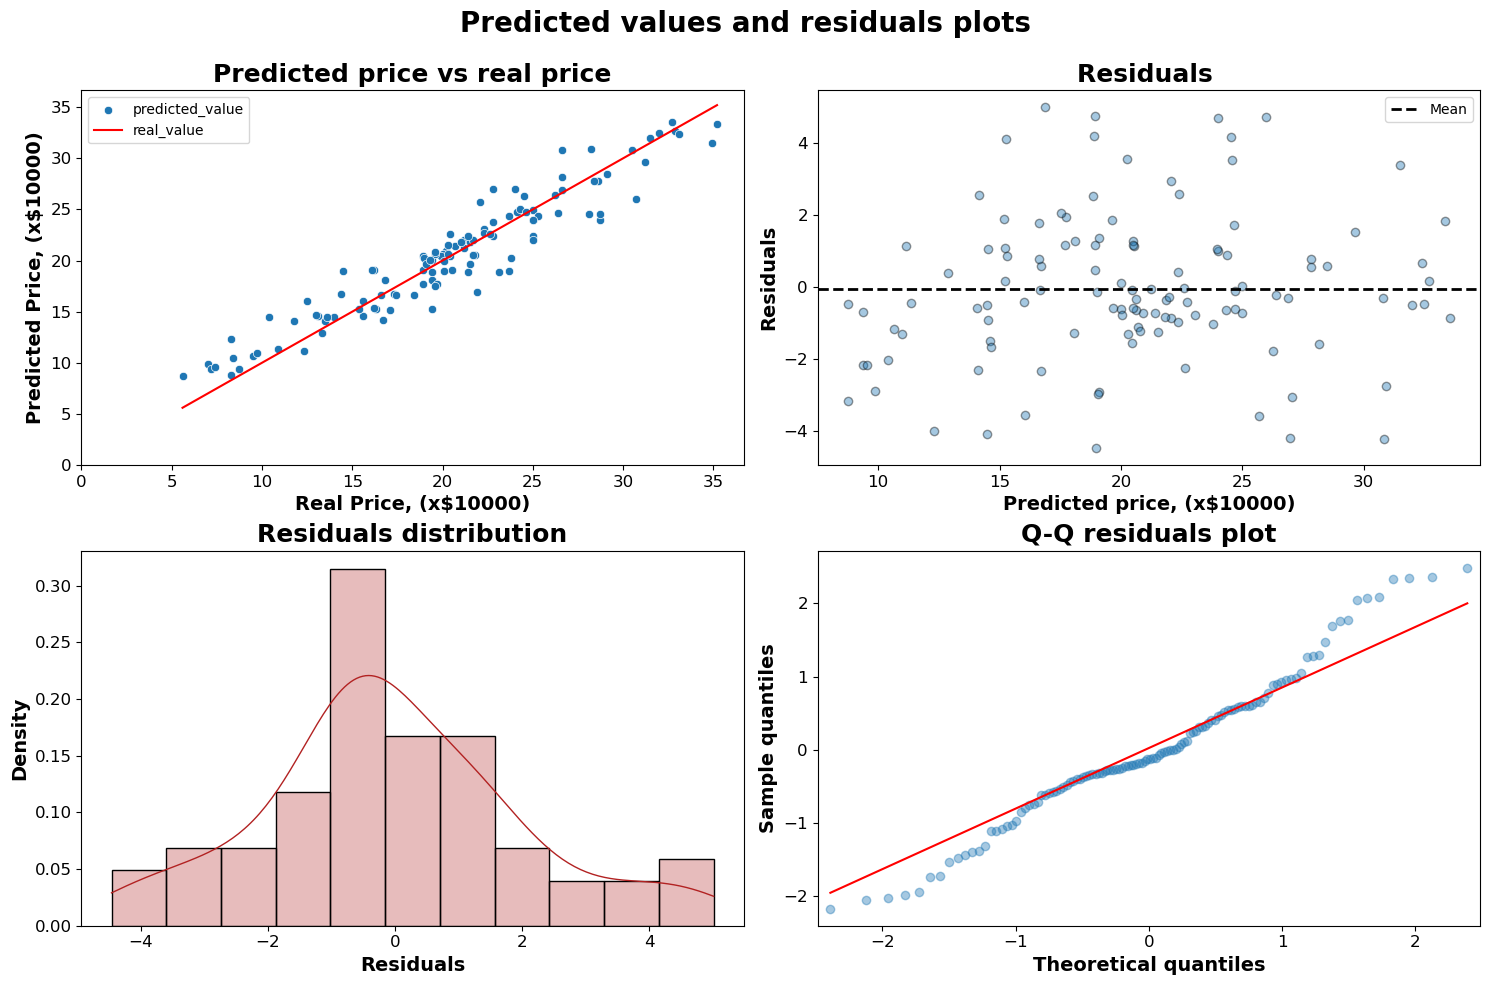

In [26]:
# Residuals
# ==============================================================================
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.scatterplot(x=y_test, y=predictions,ax=ax[0][0], label='predicted_value')
sns.lineplot(x=y_test, y=y_test,ax=ax[0][0], color='red',label='real_value')
ax[0][0].set_title("Predicted price vs real price", fontsize = 18, fontweight = "bold")
ax[0][0].set_xlabel('Real Price, (x$10000)', fontsize = 14, fontweight = "bold");
ax[0][0].set_ylabel('Predicted Price, (x$10000)',fontsize = 14, fontweight = "bold");
ax[0][0].set(xlim=(0, None), ylim=(0,None))
ax[0, 0].tick_params(axis='both', which='major', labelsize=12)
sns.histplot(
    data    = residuals,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = ax[1, 0]
)
ax[1, 0].set_title('Residuals distribution', fontsize = 18, fontweight = "bold")
ax[1, 0].set_xlabel('Residuals', fontsize = 14, fontweight = "bold")
ax[1, 0].set_ylabel('Density', fontsize = 14, fontweight = "bold")
ax[1, 0].tick_params(labelsize = 7)
ax[1, 0].tick_params(axis='both', which='major', labelsize=12)
ax[0, 1].scatter(predictions, residuals,
                   edgecolors=(0, 0, 0), alpha = 0.4)
ax[0, 1].axhline(y = (residuals).mean(), linestyle = '--', color = 'black', lw=2, label='Mean')
ax[0, 1].legend()
ax[0, 1].set_title('Residuals ', fontsize = 18, fontweight = "bold")
ax[0, 1].set_xlabel('Predicted price, (x$10000)', fontsize = 14, fontweight = "bold")
ax[0, 1].set_ylabel('Residuals', fontsize = 14, fontweight = "bold")
ax[0, 1].tick_params(axis='both', which='major', labelsize=12)
sm.qqplot(
    residuals,
    fit   = True,
    line  = 'q',
    ax    = ax[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
ax[1, 1].set_title('Q-Q residuals plot', fontsize = 18, fontweight = "bold")
ax[1, 1].set_xlabel('Theoretical quantiles', fontsize = 14, fontweight = "bold")
ax[1, 1].set_ylabel('Sample quantiles', fontsize = 14, fontweight = "bold")
ax[1, 1].tick_params(labelsize = 7)
ax[1, 1].tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Predicted values and residuals plots', fontsize = 20, fontweight = "bold");

The residuals are normally distributed as confirmed with the D'Agostino's K-squared test ($p_{value}>0.05$) and the Q-Q plot. Moreover, the residual plot (upper-right graph) are randomly distributed (no pattern) around the zero line, indicating that there is a linear relationship betwen x and y. Alltogether it indicates that the prices predicted by the model (upper-left graph) are correct, and the model performs well. 

<div class="alert alert-success h1" role="alert">
    <b>Conclusions
</b>
<a class="anchor" id="intro"></a> </div>

The model predicts well the real values of the $t_{test}$ dataset, showing that the main variables that determine the housing price are the LSTAT and RM, i.e., the  % lower status of the population and the average number of rooms per dwelling,, respectively. After optimizing the hyperparameters, the root-mean square error, (RMSE) of the model is reduced from 2.17 to 2.03 units. The predictions of the optimized model deviates 2.03 units (\\$2030) from the real value. Moreover, after the model optimization, the coefficient of determination, $\mathrm{R}^2$ improves until 0.9.